# Face Processing

## PENDAHULUAN

Pemrosesan gambar adalah suatu hal yang dapat kita lakukan dalam bahasa pemrograman Python ini. Pemrosesan gambar memiliki tujuan akhir yang berbeda-beda. Tujuannya diantaranya adalah kompres file gambar, menentukan tingkat kemiripan atau perbedaan dari dua gambar yang diberikan pada program, mendeteksi wajah dalam suatu gambar, dan masih banyak lagi. Sub-topik yang diangkat kali ini ialah *Face Processing* dengan memprediksi wajah seorang anak dari dua foto pasangan.

Untuk mencapai tujuan akhir ini, bagian-bagian program yang harus dilakukan di antaranya ada 

1. mendeklerasikan fungsi face detector,

2. proses penggabungan dua gambar (pasangan),

3. menyediakan sebuah dataframe yang diisi dengan 20 foto bayi atau anak balita, dan

4. proses mencari tingkat kemiripan maksimal antara hasil penggabungan gambar pasangan dengan foto bayi yang tersedia.

#### Libraries

In [1]:
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from pandas import DataFrame as df
from numpy import asarray

### 1. Fungsi Face Detector

Face Detector digunakan sebagai parameter untuk membandingkan kedua gambar dari segi ukuran luas muka dan lokasi muka pada gambar. Ukuran luas muka ataupun lokasi muka yang berbeda adalah kejadian yang rentan mengakibatkan tingkat keakurasian pemprediksian wajah anak kecil mengecil. Dengan begitu, program ini akan menanyakan kepada pengguna program ini bahwa apa program ini masih terus ingin berjalan meskipun terdapat perbedaan luas muka atau lokasi muka di dua gambar.

*Directory* untuk gambar disesuaikan dengan lokasi penyimpanan foldernya dalam komputer/laptop Anda. Selain itu, diharuskan pula bahwa *Directory* berada dalam workspace IDE yang dipakai. Untuk Jupyter Notebook, dapat di-run syntax **pwd** agar mengetahui *workspace* atau *working directory*-nya.

Di perangkat penyusun program sendiri berada di path : C:\\Users\\dirak\\PICTURES\\(nama file).jpg

*Directory* module/library yang diperlukan untuk mendeteksi wajah pun harus dispesifikkan. Dengan ketentuan yang mirip seperti untuk gambar, bahwa diharuskan module/library berada di dalam *working directory*. Nama File : **haarcascade_frontalface_default.xml**

Di perangkat penyusun program sendiri berada di path : C:\\Users\\dirak\\RESOURCES\\haarcascade_frontalface_default.xml

In [2]:
def face_detect() :
    print("Picture 1 Directory : ")
    directory1 = str(input())
    print("Picture 2 Directory : ")
    directory2 = str(input())
    
    #Picture 1
    image_1_cv2      = cv2.imread(directory1)
    image_1_cv2_gray = cv2.cvtColor(image_1_cv2,cv2.COLOR_BGR2GRAY)
    
    #Picture 2
    image_2_cv2      = cv2.imread(directory2)
    image_2_cv2_gray = cv2.cvtColor(image_2_cv2,cv2.COLOR_BGR2GRAY)
    
    
    print("Picture 1 Size : ",image_1_cv2_gray.shape)
    print("Picture 2 Size : ",image_2_cv2_gray.shape)
    print("")
    
    if image_1_cv2_gray.shape == image_2_cv2_gray.shape :
    
        #Original Image to place the face detector :
        image_1_pil  = Image.open(directory1)
        image_2_pil  = Image.open(directory2)
        
        matrix_1_pil   = asarray(image_1_pil)
        matrix_2_pil   = asarray(image_2_pil)
        
        
        
        #Face Detector Module / Library
        faceCascade = cv2.CascadeClassifier("C:\\Users\\dirak\\RESOURCES\\haarcascade_frontalface_default.xml")
        
        
        
        face_1 = faceCascade.detectMultiScale(image_1_cv2_gray,1.1,4)
        face_2 = faceCascade.detectMultiScale(image_2_cv2_gray,1.1,4)
        
        #Create a bounding box
        for (x1,y1,w1,h1) in face_1 :
            cv2.rectangle(matrix_1_pil,(x1,y1),(x1+w1,y1+h1),(255,100,10),2)
            
        centre_1_x  = x1 + w1/2
        centre_1_h  = h1 + y1/2
        face_1_area = w1 * h1
        print("Luas Muka terdeteksi di gambar 1 = ",face_1_area)
            
        for (x2,y2,w2,h2) in face_2 :
            cv2.rectangle(matrix_2_pil,(x2,y2),(x2+w2,y2+h2),(255,100,10),2)
            
        centre_2_x = x2 + w2/2
        centre_2_h = h2 + y2/2
        face_2_area = w2 * h2
        print("Luas Muka terdeteksi di gambar 2 = ",face_2_area)
        
        #Final Result
        
        Image1 = Image.fromarray(matrix_1_pil)
        Image2 = Image.fromarray(matrix_2_pil)
        stacked_image = np.hstack((matrix_1_pil, matrix_2_pil))
        stacked_image = Image.fromarray(stacked_image)
        
    else :
        print("")
        print("Ukuran gambar berbeda, silahkan coba lagi")
        Image1, Image2, stacked_image, face_1_area, face_2_area = "ERROR", "ERROR", "ERROR","ERROR", "ERROR"
        centre_1_x, centre_2_x, centre_1_h, centre_2_h          = "ERROR", "ERROR","ERROR", "ERROR"
        
    return (stacked_image, Image1, Image2, 
            face_1_area, face_2_area, centre_1_x, centre_2_x, centre_1_h, centre_2_h, image_1_cv2, image_2_cv2 )

In [3]:
stacked, face1, face2, face_1_area, face_2_area, centre_1_x, centre_2_x, centre_1_h, centre_2_h, image_1_cv2, image_2_cv2 = face_detect()

Picture 1 Directory : 
C:\Users\dirak\PICTURES\man1.jpg
Picture 2 Directory : 
C:\Users\dirak\PICTURES\woman3.jpg
Picture 1 Size :  (500, 500)
Picture 2 Size :  (500, 500)

Luas Muka terdeteksi di gambar 1 =  49729
Luas Muka terdeteksi di gambar 2 =  47961


### Hasil Akhir Face Detection

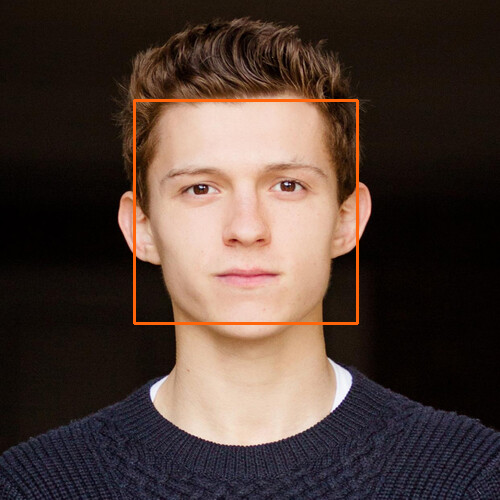

In [4]:
face1

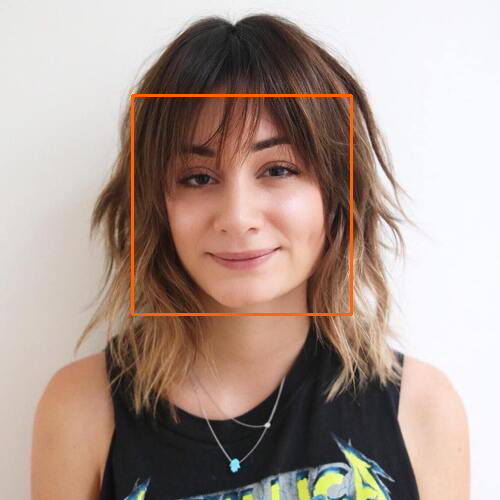

In [5]:
face2

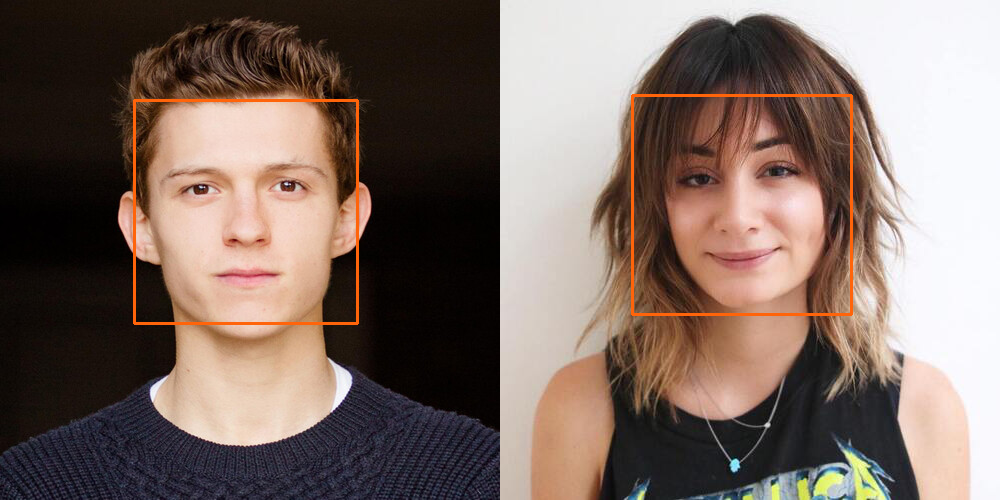

In [6]:
stacked

Akan muncul pernyataan disclaimer atau program yang menanyakan apakah program ingin terus dilanjut.

In [7]:
if face_1_area != face_2_area or centre_1_x != centre_2_x or centre_1_h != centre_2_h :
    print("Apakah program ini ingin terus dilanjutkan meskipun ukuran atau letak wajahnya berbeda?")
else :
    print("")

Apakah program ini ingin terus dilanjutkan meskipun ukuran atau letak wajahnya berbeda?


.

### 2. Proses Penggabungan Dua Gambar (Pasangan)

Penggabungan dua gambar dapat dilakukan dengan berbagai cara. Salah satunya mengambil **nilai rata-rata** dari tiap elemen masing-masing matriks. Di akhir, program ini akan menjadikan list agar mempermudah ketika ingin mengubah ke dalam bentuk dataframe untuk proses pembandingan dengan foto-foto bayi atau anak balita yang ada.

In [8]:
def photo_combining(x,y) :
    image_1_cv2_gray = cv2.cvtColor(x,cv2.COLOR_BGR2GRAY).astype('int32')
    image_2_cv2_gray = cv2.cvtColor(y,cv2.COLOR_BGR2GRAY).astype('int32')
    
    list = []

    for m in range (500) :
        for n in range (500) :
            list.append((image_1_cv2_gray[m][n] + image_2_cv2_gray[m][n])/2)
    return (list)

In [9]:
list = photo_combining(image_1_cv2,image_2_cv2)

In [10]:
# Ukuran list
len(list)

250000

In [11]:
# Display 10 barisan awal dalam list
list[:10]

[122.5, 122.5, 123.0, 123.5, 124.0, 124.0, 124.0, 124.0, 124.5, 125.5]

.

### 3. Deklarasikan Data Frame yang Diisi Informasi Gambar Bayi

Terdapat 20 foto bayi yang akan dibandingkan dengan list gabungan foto dua pasangan.

In [12]:
def baby_picture(directory,i) :
    baby_cv2 = cv2.imread(directory)
    baby_cv2_gray = cv2.cvtColor(baby_cv2,cv2.COLOR_BGR2GRAY)
    
    list = []
    print("")
    for m in range (500) :
        for n in range (500) :
            list.append(baby_cv2_gray[m][n])
    
    D  = ("Bayi_{}".format(i))
    dframe = pd.DataFrame(list, columns=[str(D)])
    return(dframe)

In [13]:
#Creating Babies Pictures Dataframe

df1  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi1.jpeg",1)
df2  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi2.jpeg",2)
df3  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi3.jpeg",3)
df4  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi4.jpeg",4)
df5  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi5.jpeg",5)
df6  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi6.jpg",6)
df7  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi7.jpg",7)                  
df8  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi8.jpg",8)                 
df9  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi9.jpg",9)                
df10 = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi10.jpg",10)


df11  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi11.jpg",11)
df12  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi12.jpg",12)
df13  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi13.jpg",13)
df14  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi14.jpg",14)
df15  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi15.jpg",15)
df16  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi16.jpg",16)
df17  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi17.jpg",17)                  
df18  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi18.jpg",18)                 
df19  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi19.jpg",19)                
df20  = baby_picture("C:\\Users\\dirak\\PICTURES\\bayi20.jpg",20)

baby_dframe = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20],axis=1)
baby_dframe

,Bayi_1,Bayi_2,Bayi_3,Bayi_4,Bayi_5,Bayi_6,Bayi_7,Bayi_8,Bayi_9,Bayi_10,Bayi_11,Bayi_12,Bayi_13,Bayi_14,Bayi_15,Bayi_16,Bayi_17,Bayi_18,Bayi_19,Bayi_20
0,235,250,255,228,21,236,255,193,255,141,89,73,153,44,224,175,255,228,11,157
1,235,250,255,228,21,241,255,193,255,141,93,73,153,44,224,174,255,228,11,157
2,235,250,255,228,21,244,255,193,255,140,96,72,154,43,224,174,255,228,10,157
3,235,250,255,228,21,241,255,193,255,140,98,73,154,43,225,173,255,228,10,157
4,235,250,255,228,22,239,255,193,255,140,99,74,154,43,226,173,255,228,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,227,92,129,203,108,238,255,164,255,190,23,15,220,13,67,244,204,121,46,247
249996,224,89,127,201,95,238,255,164,255,190,33,15,220,22,66,245,203,122,53,247
249997,226,87,129,198,93,240,255,164,255,190,45,15,219,34,66,244,200,123,66,247
249998,223,86,132,193,97,235,255,164,255,190,57,15,218,41,66,243,195,119,79,247


### 4. Mencari Tingkat Kemiripan Maksimal antara Hasil Penggabungan Gambar Pasangan dengan Foto Bayi yang Tersedia

Pertama, kami gabungkan terlebih dahulu list gabungan dua foto pasangan ke dalam dataframe yang sudah dibuat tadi (baby_dframe)

In [14]:
comparing_dframe = baby_dframe.assign(Parents=list)

comparing_dframe

,Bayi_1,Bayi_2,Bayi_3,Bayi_4,Bayi_5,Bayi_6,Bayi_7,Bayi_8,Bayi_9,Bayi_10,...,Bayi_12,Bayi_13,Bayi_14,Bayi_15,Bayi_16,Bayi_17,Bayi_18,Bayi_19,Bayi_20,Parents
0,235,250,255,228,21,236,255,193,255,141,...,73,153,44,224,175,255,228,11,157,122.5
1,235,250,255,228,21,241,255,193,255,141,...,73,153,44,224,174,255,228,11,157,122.5
2,235,250,255,228,21,244,255,193,255,140,...,72,154,43,224,174,255,228,10,157,123.0
3,235,250,255,228,21,241,255,193,255,140,...,73,154,43,225,173,255,228,10,157,123.5
4,235,250,255,228,22,239,255,193,255,140,...,74,154,43,226,173,255,228,10,158,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,227,92,129,203,108,238,255,164,255,190,...,15,220,13,67,244,204,121,46,247,143.0
249996,224,89,127,201,95,238,255,164,255,190,...,15,220,22,66,245,203,122,53,247,136.5
249997,226,87,129,198,93,240,255,164,255,190,...,15,219,34,66,244,200,123,66,247,131.0
249998,223,86,132,193,97,235,255,164,255,190,...,15,218,41,66,243,195,119,79,247,136.5


### Menggunakan Cosinus Similarity

**Menghasilkan tingkat kemiripan yang lebih tinggi dibandingkan dengan syntax .corr bawaan library DataFrame-Pandas.**

In [15]:
def dot(u,v) :
    
    sum = 0
    for i in range(len(u)) :
        sum += u[i] * v[i]
    return sum


def panjang_vektor(u) :
    sum = 0
    for i in range (len(u)) :
        sum += (u[i])**2
    
    sum_sqrt = math.sqrt(sum)
    return sum_sqrt

In [16]:
list = []
for i in range (1,21) : #Just the babies column
    column = ("Bayi_{}".format(str(i)))
    u = comparing_dframe['Parents']
    v = comparing_dframe[column]
    
    cosinus_similarity = dot(u,v) / (panjang_vektor(u) * panjang_vektor(v))
    list.append(cosinus_similarity)

In [17]:
list

[0.9104909559673499,
 0.8761601170222881,
 0.887618811442804,
 0.9271273383485295,
 0.8588870874409392,
 0.9241406246599776,
 0.906960121990079,
 0.9016410918576305,
 0.8436683043024019,
 0.8681791784163192,
 0.8960917083999204,
 0.8493317203005012,
 0.8508793825921678,
 0.8456923051872031,
 0.8194067939534286,
 0.8539939506065183,
 0.8101942885979901,
 0.8457186576740461,
 0.7363080519759324,
 0.835031463106211]

In [18]:
# Mencari nilai maksimum dan juga indeks dari nilai maksimum tersebut
max_value = 0

for i in list :
    if i > max_value :
        max_value = i
    else :
        continue

index = list.index(max_value)

print("Korelasi tertinggi ialah dengan gambar Bayi ke-{} dengan \ntingkat korelasi sebesar {} ".format(index+1, max_value))

Korelasi tertinggi ialah dengan gambar Bayi ke-4 dengan 
tingkat korelasi sebesar 0.9271273383485295 


#### Fungsi Menunjukkan Gambar Original Bayi

In [19]:
def show_original_image(directory) :
    image = Image.open(directory)
    return(image)

In [22]:
photo = ("Bayi_{}".format(str(index+1)))

In [23]:
#Untuk mendapatkan original image bayi

if photo == "Bayi_1" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi1.jpeg"
    y =show_original_image(x)
elif photo == "Bayi_2" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi2.jpeg"
    y = show_original_image(x)
elif photo == "Bayi_3" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi3.jpeg"
    y = show_original_image(x)
elif photo == "Bayi_4" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi4.jpeg"
    y = show_original_image(x)
elif photo == "Bayi_5" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi5.jpeg"
    y = show_original_image(x)
elif photo == "Bayi_6" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi6.jpg"
    y = show_original_image(x)
elif photo == "Bayi_7" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi7.jpg"
    y = show_original_image(x)
elif photo == "Bayi_8" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi8.jpg"
    y = show_original_image(x)
elif photo == "Bayi_9" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi9.jpg"
    y = show_original_image(x)
elif photo == "Bayi_10" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi10.jpg"
    y = show_original_image(x)
    
elif photo == "Bayi_11" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi11.jpeg"
    y =show_original_image(x)
elif photo == "Bayi_12" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi12.jpeg"
    y = show_original_image(x)
elif photo == "Bayi_13" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi13.jpeg"
    y = show_original_image(x)
elif photo == "Bayi_14" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi14.jpeg"
    y = show_original_image(x)
elif photo == "Bayi_15" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi15.jpeg"
    y = show_original_image(x)
elif photo == "Bayi_16" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi16.jpg"
    y = show_original_image(x)
elif photo == "Bayi_17" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi17.jpg"
    y = show_original_image(x)
elif photo == "Bayi_18" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi18.jpg"
    y = show_original_image(x)
elif photo == "Bayi_19" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi19.jpg"
    y = show_original_image(x)
elif photo == "Bayi_20" :
    x = "C:\\Users\\dirak\\PICTURES\\bayi20.jpg"
    y = show_original_image(x)

# Hasil Akhir :

## Orang Tua :

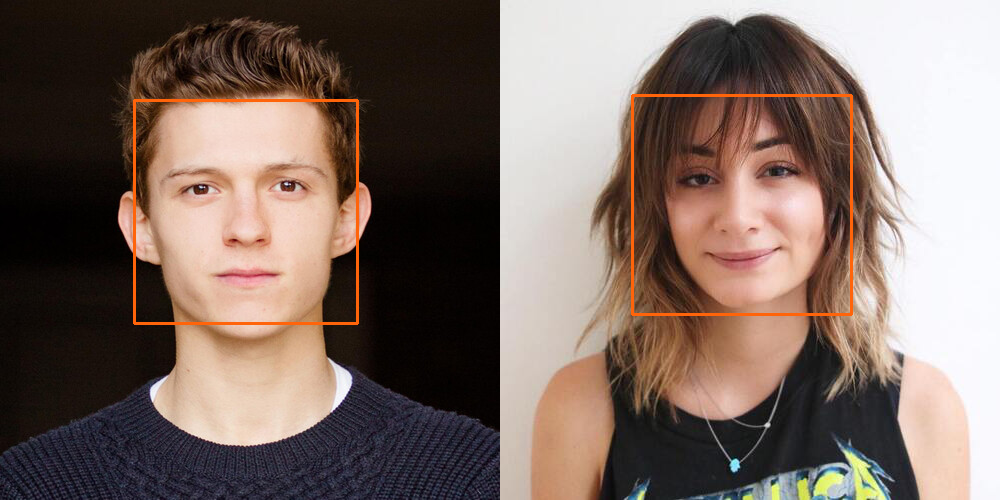

In [24]:
stacked

## Prediksi Wajah Anak :

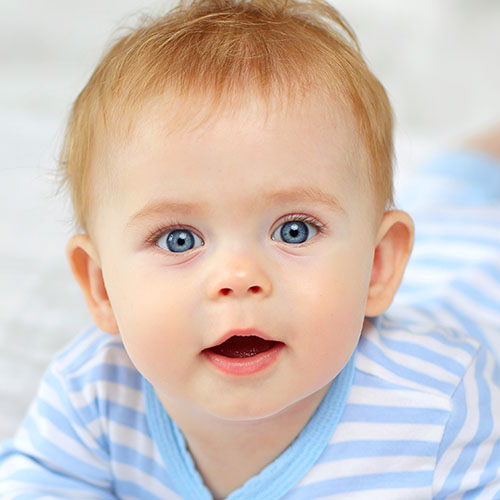

In [25]:
y